## test the pylamost

In order to access protected LAMOST data, you should provide your token.
Your token can be obtained from http://www.lamost.org/lmusers/user/, the "Password" is the token.
When you get your token you can also create a file `~/pylamost.ini` or `%userprofile%/pylamost.ini` on Windows, with content:
```
token=12345678
```
Then you don't have to write the token next time.

In [1]:
from pylamost import lamost
lm=lamost(dataset=8, version=2.0)#init the lamost class
#lm.token='12345678'#specify your token. You can pass this step, if you created the ~/pylamost.ini file.
#Using international released data, token can be skip, except sql() function.

#lm.dataset=8 #specify the Data Release number
#lm.version=2.0 #specify the data version, or leave it None to always use the leatest version.

### Query interface

In [2]:
# query low resolution catalog by obsid
params={'output.fmt':'csv','obsidTextarea':'353301001'}
low=lm.query(params)
print(low)

combined_obsid|combined_ra|combined_dec
353301001|341.0645660000|19.5665910000



In [3]:
# query medium resolution catalog by obsid
params={'output.fmt':'csv','obsidTextarea':'588902003'}
med=lm.query(params, ismed=True)
print(med)

med_combined_obsid|med_combined_ra|med_combined_dec
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000
588902003|15.3672776000|4.0094024000



In [4]:
# query low resolution catalog by ra,dec file
params={'output.fmt':'csv','pos.type':'proximity'}
files={'pos.posfile':('sample.txt', open('sample.txt', 'r'))}
low=lm.query2(params, files)
print(low)

inputobjs_input_id|inputobjs_input_ra|inputobjs_input_dec|inputobjs_dist|combined_obsid|combined_ra|combined_dec
1|341.343583|19.510335|0.0014399999805037719|353301002|341.3435830000|19.5103354000
2|341.364474|19.595276|0|353301023|341.3644740000|19.5952760000
3|340.560232|19.855086|0|353301041|340.5602320000|19.8550860000
4|15.367278|4.009402|0.07680604462546192|758615059|15.3672869000|4.0094214000
4|15.367278|4.009402|0.07565175395921703|55115225|15.3672870000|4.0094210000



In [5]:
# query medium resolution catalog by ra,dec file
params={'output.fmt':'csv','pos.type':'proximity'}
files={'pos.posfile':('sample.txt', open('sample.txt', 'r'))}
low=lm.query2(params, files, ismed=True)
print(low)

inputobjs_input_id|inputobjs_input_ra|inputobjs_input_dec|inputobjs_dist|med_combined_obsid|med_combined_ra|med_combined_dec
4|15.367278|4.009402|0.0020339770238076206|596302003|15.3672776000|4.0094024000
4|15.367278|4.009402|0.011359127041639681|694315074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.011359127041639681|682215074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.011359127041639681|694315074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.011359127041639681|696415074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.011359127041639681|690415074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.0020339770238076206|588902003|15.3672776000|4.0094024000
4|15.367278|4.009402|0.011359127041639681|682815074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.011359127041639681|695215074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.011359127041639681|682815074|15.3672750000|4.0094010000
4|15.367278|4.009402|0.0020339770238076206|598602003|15.3672776000|4.0094024000
4|1

### SQL query interface

In [6]:
s=lm.sql("select c.obsid,c.obsdate, c.ra, c.dec, c.z, c.lmjd from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.2d>' limit 5")
print(s)

obsid|obsdate|ra|dec|z|lmjd
372209182|2015-10-17|331.8409248000|-1.5136398000|0.0000290900|57313
73409177|2012-10-27|331.8244950000|-1.4888540000|-0.0001170143|56228
73409194|2012-10-27|331.8683000000|-1.3664111000|0.0000552600|56228
73409028|2012-10-27|331.7668560000|-1.2460080000|0.0000309214|56228
372209026|2015-10-17|331.5659015000|-1.4899483000|0.0000393400|57313



In [7]:
s=lm.sql("select c.obsid from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.3d>' limit 5")
print(s)

obsid
372209176
372209179
372209181
372209182
372209196



In [8]:
csv = lm.getFitsCsv(obsid='101068')
print(csv)

Wavelength,Flux,FluxSmooth7,FluxSmooth15
3699.986328,57.359245,0.000000,0.000000
3700.838379,1.769271,1.769271,0.000000
3701.690674,21.817541,15.730600,1.769271
3702.542969,-26.736965,21.817541,9.925053
3703.395752,15.730600,15.730600,15.730600
3704.248535,25.619478,21.817541,15.730600
3705.101563,45.541965,15.730600,21.817541
3705.954834,-93.916580,25.619478,21.817541
3706.808105,39.269634,38.294594,15.730600
3707.661865,9.925053,38.294594,18.720991
3708.515625,65.296562,29.480621,15.730600
3709.369629,38.294594,29.480621,15.730600
3710.223877,-9.214622,9.925053,18.720991
3711.078125,29.480621,18.720991,9.925053
3711.932861,-1.957331,-1.957331,-1.957331
3712.787598,-9.322504,-8.675359,-1.957331
3713.642578,18.720991,-1.957331,-1.957331
3714.497803,-23.116117,-8.675359,-8.675359
3715.353271,-8.675359,-9.322504,-8.675359
3716.208740,36.157139,-8.742160,-8.742160
3717.064697,-45.536633,-8.742160,-8.675359
3717.920654,-21.188938,-8.742160,-8.742160
3718.776855,-8.742160,-8.742160,-8.74216

### simple information

In [9]:
# get low resolution fiber info
info=lm.getInfo('353301001')
for k,v in info.items():
    print(k,':',v)

obsid : 353301001
uid : G13411914569526
gp_id : 2833715144390770816
designation : J224415.49+193359.7
obsdate : 2015-09-12
lmjd : 57278
mjd : 57277
planid : EG224429N215706B01
spid : 1
fiberid : 1
ra_obs : 341.0645660000
dec_obs : 19.5665910000
snru : 5.78
snrg : 75.73
snrr : 172.27
snri : 215.29
snrz : 171.30
class : STAR
subclass : K7
z : 0.0000403279
z_err : 0.0000182460
ps_id : 131473410641749976
mag_ps_g : -999.0000000000
mag_ps_r : -999.0000000000
mag_ps_i : 18.1622009277
mag_ps_z : -999.0000000000
mag_ps_y : -999.0000000000
gaia_source_id : 2833715144390770816
gaia_g_mean_mag : 14.18474900
tsource : LEGUE_LCH
fibertype : Obj
tfrom : LCH100003
tcomment : 13733800519180097
offsets : 0
offsets_v : 0.000
ra : 341.0645660000
dec : 19.5665910000
fibermask : 128
with_norm_flux : 1
feh : -0.321
alpha_m : -9999.000000
rv_err : 5.47
feh_err : 0.034
teff_err : 40.82
rv : 12.09
logg_err : 0.057
logg : 4.700
teff : 4141.78
alpha_m_err : -9999.000000
file : 20150912/EG224429N215706B01/spec-57

In [10]:
# get medium resolution fiber info
info=lm.getInfo('588902003', ismed=True)
print(info)

[{'obsid': 588902003, 'designation': 'J010128.14+040033.8', 'obsdate': '2017-09-28', 'mjd': 58024, 'lmjd': 58025, 'planid': 'HIP507401', 'spid': 2, 'fiberid': 3, 'lmjm': 83556105, 'band': 'B', 'ra': 15.3672776, 'dec': 4.0094024, 'ra_obs': 15.367278, 'dec_obs': 4.0094024}, {'obsid': 588902003, 'designation': 'J010128.14+040033.8', 'obsdate': '2017-09-28', 'mjd': 58024, 'lmjd': 58025, 'planid': 'HIP507401', 'spid': 2, 'fiberid': 3, 'lmjm': 83556092, 'band': 'R', 'ra': 15.3672776, 'dec': 4.0094024, 'ra_obs': 15.367278, 'dec_obs': 4.0094024}, {'obsid': 588902003, 'designation': 'J010128.14+040033.8', 'obsdate': '2017-09-28', 'mjd': 58024, 'lmjd': 58025, 'planid': 'HIP507401', 'spid': 2, 'fiberid': 3, 'lmjm': 83556065, 'band': 'R', 'ra': 15.3672776, 'dec': 4.0094024, 'ra_obs': 15.367278, 'dec_obs': 4.0094024}, {'obsid': 588902003, 'designation': 'J010128.14+040033.8', 'obsdate': '2017-09-28', 'mjd': 58024, 'lmjd': 58025, 'planid': 'HIP507401', 'spid': 2, 'fiberid': 3, 'lmjm': 83556146, 'ban

### download FITS file

In [11]:
#download low resolution fits file by obsid
lm.downloadFits(obsid='353301001',savedir='./')

'.//spec-57278-EG224429N215706B01_sp01-001.fits.gz'

In [12]:
#download medium resolution fits file by obsid
lm.downloadFits(obsid='588902003',savedir='./',ismed=True)

'.//med-58025-HIP507401_sp02-003.fits.gz'

### download spectrumthumbnail png

In [13]:
#download low resolution spectrum thumbnail png file by obsid
#medium resolution fits file has no png thumbnail
lm.downloadPng(obsid='353301007',savedir='./')

'.//spec-57278-EG224429N215706B01_sp01-007.png'

### download csv format spectrum

In [14]:
#download low resolution csv format spectrum by obsid
csv = lm.getFitsCsv(obsid='353301007')
print(csv)

Wavelength,Flux,FluxSmooth7,FluxSmooth15
3699.986328,474.616638,474.616638,364.918640
3700.838379,511.863037,474.616638,364.918640
3701.690674,493.769470,474.616638,376.968597
3702.542969,498.699524,474.616638,376.968597
3703.395752,460.126038,460.126038,389.142944
3704.248535,432.841522,432.841522,389.142944
3705.101563,389.142944,389.142944,402.786011
3705.954834,364.918640,376.968597,409.947083
3706.808105,358.831451,376.968597,409.947083
3707.661865,376.968597,376.968597,409.947083
3708.515625,370.277649,376.968597,409.947083
3709.369629,402.786011,388.020172,409.947083
3710.223877,388.020172,402.786011,409.947083
3711.078125,409.947083,409.947083,409.947083
3711.932861,443.240875,443.240875,443.240875
3712.787598,471.153809,468.947479,468.947479
3713.642578,468.947479,471.153809,468.947479
3714.497803,529.949402,516.207092,468.947479
3715.353271,516.207092,516.207092,468.947479
3716.208740,525.257263,525.257263,468.947479
3717.064697,538.890808,525.257263,468.947479
3717.920654,50

In [15]:
#download medium resolution csv format spectrum by obsid
csv = lm.getFitsCsv(obsid='588902003',ismed=True)
print(csv)

{"spectrums":[{"extname":"COADD_B","average":1990.829590,"sigma":344645.937500,"threshold":3448450.250000,"data":[[4.916090e+03,0.000000e+00],[4.916204e+03,1.055759e+03],[4.916317e+03,9.455631e+02],[4.916431e+03,9.209434e+02],[4.916544e+03,9.288915e+02],[4.916657e+03,9.496721e+02],[4.916771e+03,9.493353e+02],[4.916884e+03,9.366899e+02],[4.916998e+03,9.437109e+02],[4.917108e+03,9.586409e+02],[4.917222e+03,9.634517e+02],[4.917335e+03,9.511086e+02],[4.917448e+03,9.166175e+02],[4.917562e+03,8.980591e+02],[4.917675e+03,9.127986e+02],[4.917789e+03,9.175345e+02],[4.917902e+03,9.038895e+02],[4.918015e+03,9.045593e+02],[4.918128e+03,9.132558e+02],[4.918242e+03,8.866428e+02],[4.918355e+03,8.449492e+02],[4.918469e+03,8.401785e+02],[4.918582e+03,8.552209e+02],[4.918696e+03,8.673918e+02],[4.918809e+03,8.815617e+02],[4.918922e+03,9.000836e+02],[4.919036e+03,9.011088e+02],[4.919146e+03,8.780846e+02],[4.919260e+03,8.413109e+02],[4.919374e+03,7.974450e+02],[4.919487e+03,7.650039e+02],[4.919600e+03,7.37

### Cone Search Protocol

In [16]:
#fetch low resolution catalog conesearch result 
cs = lm.conesearch(ra=10.0004738,dec=40.9952444,radius=0.2)
print(cs)

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.2 http://vo.ari.uni-heidelberg.de/docs/schemata/VOTable-1.2.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" version="1.2">
<RESOURCE type="results">
<DESCRIPTION>This is low-resolution data from LAMOST dr8. Powered by Chinese Virtual Observatory (China-VO): http://www.china-vo.org Fri Apr 14 01:58:39 CST 2023 In case of problem, please contact:	support@lamost.org
</DESCRIPTION><INFO name="SERVICE_PROTOCOL" value="1.2">ConeSearch</INFO>
<INFO name="QUERY_STATUS" value="OK"></INFO>
<TABLE>
<FIELD ID="COLID_70274" name="catalogue_obsid" datatype="char" arraysize="*" ucd="ID_MAIN">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_70275" name="catalogue_uid" datatype="char" arraysize="*" ucd="">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_70276" name="catalogue_gp_id" datatype="long" ucd="">
<DESCRIPTION></DESCRIPTION>


In [17]:
#fetch medium resolution catalog conesearch result 
cs = lm.conesearch(ra=15.3672776,dec=4.0094024,radius=0.002, ismed=True)
print(cs)

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.2 http://vo.ari.uni-heidelberg.de/docs/schemata/VOTable-1.2.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" version="1.2">
<RESOURCE type="results">
<DESCRIPTION>This is med-resolution data from LAMOST dr8. Powered by Chinese Virtual Observatory (China-VO): http://www.china-vo.org Fri Apr 14 01:58:40 CST 2023 In case of problem, please contact:	support@lamost.org
</DESCRIPTION><INFO name="SERVICE_PROTOCOL" value="1.2">ConeSearch</INFO>
<INFO name="QUERY_STATUS" value="OK"></INFO>
<TABLE>
<FIELD ID="COLID_70313" name="med_catalogue_mobsid" datatype="char" arraysize="*" ucd="">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_70314" name="med_catalogue_obsid" datatype="char" arraysize="*" ucd="ID_MAIN">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_70315" name="med_catalogue_uid" datatype="char" arraysize="*" ucd="">
<

### Simple Spectral Access Protocol

In [18]:
#fetch low resolution ssap search result 
ssap = lm.ssap(ra=10.0004738,dec=40.9952444,radius=0.2)
print(ssap)

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xmlns:ssa="http://www.ivoa.net/xml/DalSsap/v1.0" xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.2 http://vo.ari.uni-heidelberg.de/docs/schemata/VOTable-1.2.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" version="1.2">
<RESOURCE type="results">
<DESCRIPTION>This is low-resolution data from LAMOST dr8. Powered by Chinese Virtual Observatory (China-VO): http://www.china-vo.org Fri Apr 14 01:58:40 CST 2023 In case of problem, please contact:	support@lamost.org
</DESCRIPTION><INFO name="SERVICE_PROTOCOL" value="1.1">SSAP</INFO>
<INFO value="OK" name="QUERY_STATUS"></INFO>
<TABLE name="result">
<PARAM name="DataModel" utype="ssa:Dataset.DataModel" datatype="char" arraysize="*" value="Spectrum 1.0" />
<PARAM name="Publisher" utype="ssa:Curation.Publisher" ucd="meta.curation" datatype="char" arraysize="*" value="Chinese Virtual Observatory" />
<FIELD ID="COLID_70274" name="catalogue

In [19]:
#fetch medium resolution ssap search result 
ssap = lm.ssap(ra=15.3672776,dec=4.0094024,radius=0.002)
print(ssap)

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xmlns:ssa="http://www.ivoa.net/xml/DalSsap/v1.0" xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.2 http://vo.ari.uni-heidelberg.de/docs/schemata/VOTable-1.2.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" version="1.2">
<RESOURCE type="results">
<DESCRIPTION>This is low-resolution data from LAMOST dr8. Powered by Chinese Virtual Observatory (China-VO): http://www.china-vo.org Fri Apr 14 01:58:41 CST 2023 In case of problem, please contact:	support@lamost.org
</DESCRIPTION><INFO name="SERVICE_PROTOCOL" value="1.1">SSAP</INFO>
<INFO value="OK" name="QUERY_STATUS"></INFO>
<TABLE name="result">
<PARAM name="DataModel" utype="ssa:Dataset.DataModel" datatype="char" arraysize="*" value="Spectrum 1.0" />
<PARAM name="Publisher" utype="ssa:Curation.Publisher" ucd="meta.curation" datatype="char" arraysize="*" value="Chinese Virtual Observatory" />
<FIELD ID="COLID_70274" name="catalogue

### read local spectrum fits to data array

In [20]:
#read low resolution spectrum fits file
wavelength, specflux, spec_smooth_7, spec_smooth_15=lm.readLRSFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')
print('wavelength', wavelength)
#print('specflux', specflux)
#print('spec_smooth_7', spec_smooth_7)
print('spec_smooth_15', spec_smooth_15)

wavelength [3699.9863 3700.8384 3701.6907 ... 9094.945  9097.04   9099.135 ]
spec_smooth_15 [73.32356 73.32356 73.32356 ...  0.       0.       0.     ]


In [21]:
#read medium resolution spectrum fits file
data=lm.readMRSFits('med-58025-HIP507401_sp02-003.fits.gz')
print(data)

{'COADD_B': {'wavelength': array([4916.0903, 4916.204 , 4916.3174, ..., 5361.419 , 5361.5425,
       5361.6665], dtype=float32), 'specflux': array([   0.    , 1055.7588,  945.5631, ...,    0.    ,    0.    ,
          0.    ], dtype=float32)}, 'COADD_R': {'wavelength': array([6285.645 , 6285.79  , 6285.935 , ..., 6860.879 , 6861.037 ,
       6861.1953], dtype=float32), 'specflux': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}, 'B-83556038': {'wavelength': array([4916.058 , 4916.1743, 4916.29  , ..., 5357.7705, 5357.862 ,
       5357.956 ], dtype=float32), 'specflux': array([ 850.1575 , 1139.6208 ,  964.20514, ..., 1407.6296 , 1441.1676 ,
       1667.7201 ], dtype=float32)}, 'B-83556052': {'wavelength': array([4916.058 , 4916.1743, 4916.2876, ..., 5357.7705, 5357.862 ,
       5357.953 ], dtype=float32), 'specflux': array([ 945.1458 , 1163.9644 ,  969.62384, ..., 1363.0057 , 1528.5012 ,
       1855.3054 ], dtype=float32)}, 'B-83556065': {'wavelength': array([4916.058 , 4916.1743, 

### plot local spectrum

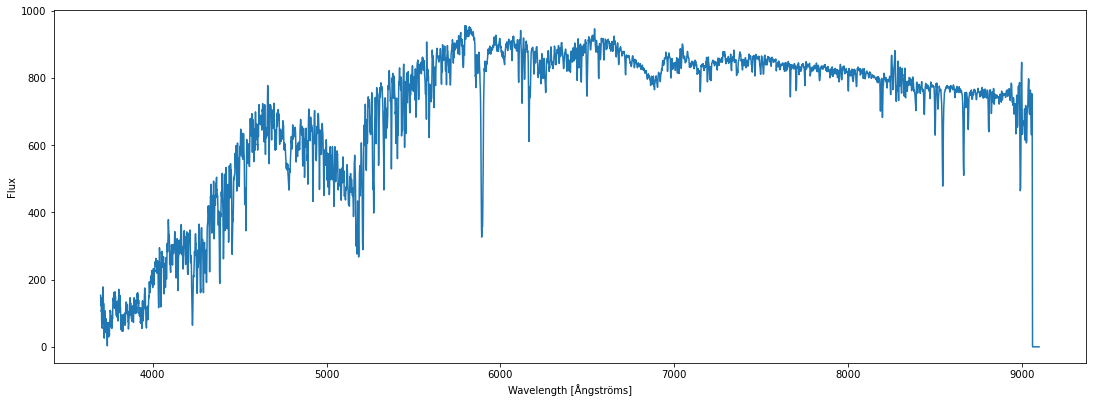

In [22]:
#plot local low resolution spectrum
lm.plotLRSFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')

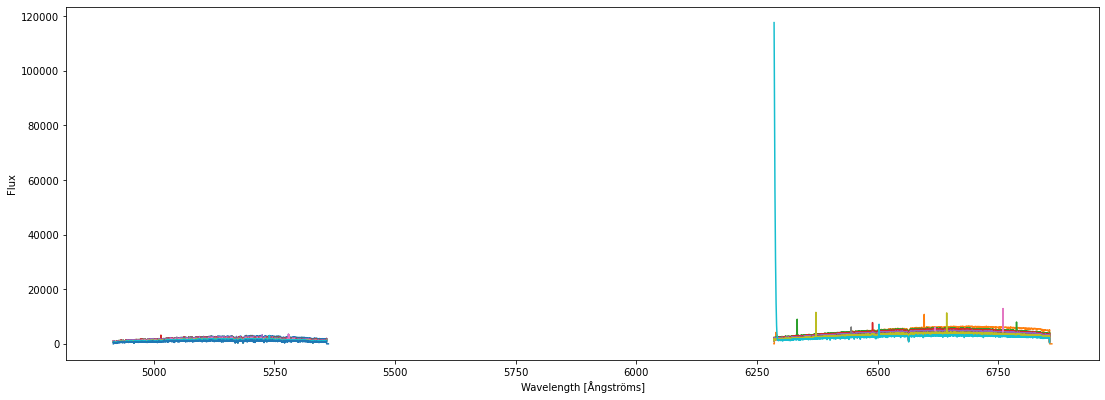

In [23]:
#plot local medium resolution spectrum
lm.plotMRSFits('med-58025-HIP507401_sp02-003.fits.gz')

### download spectrum data and plot

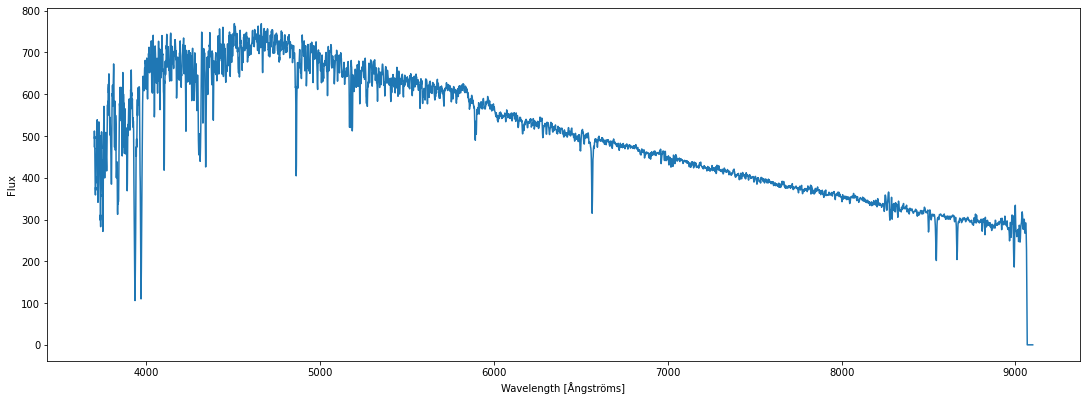

In [24]:
#download and plot low resolution spectrum
lm.downloadAndPlotLRSSpectrum('353301007')

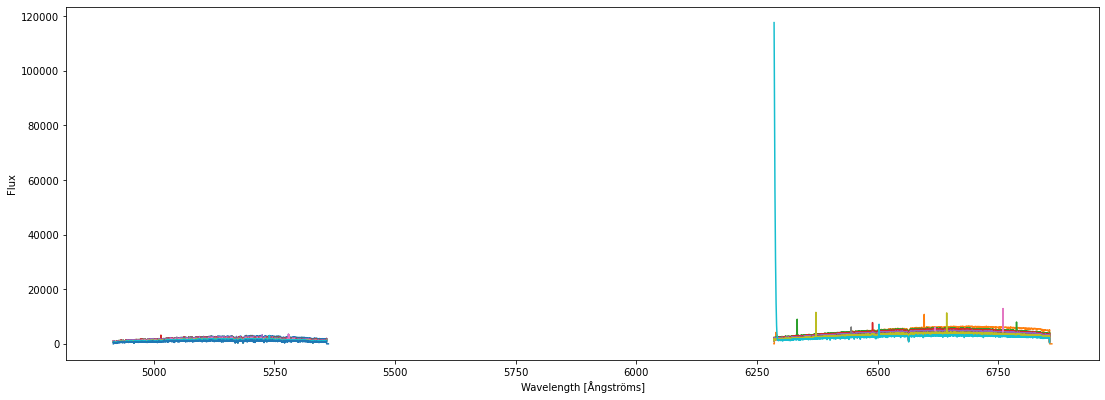

In [25]:
#download and plot medium resolution spectrum
lm.downloadAndPlotMRSSpectrum('588902003')